In [33]:
from pydataset import data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
import env

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
np.random.seed(123)
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import re

In [34]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [35]:
iris = iris.rename(columns={'Sepal.Length':'sepal_length', 'Sepal.Width':'sepal_width', 'Petal.Length':'petal_length', 'Petal.Width':'petal_width', 'Species':'species'})

In [36]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [10]:
#1
#a. I chose petal width and sepal width
X = iris[['sepal_width', 'petal_width']]

In [13]:
#b.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [14]:
iris['cluster'] = kmeans.predict(X)

In [20]:
kmeans.cluster_centers_

array([[3.04166667, 2.05208333],
       [3.45102041, 0.24489796],
       [2.70754717, 1.30943396]])

In [21]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,sepal_width,petal_width
0,3.041667,2.052083
1,3.451020,0.244898
2,2.707547,1.309434


In [22]:
iris.groupby('cluster')['petal_width', 'sepal_width'].mean()

,petal_width,sepal_width
cluster,,
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


Text(0.5, 1.0, 'Visualizing Cluster Centers')

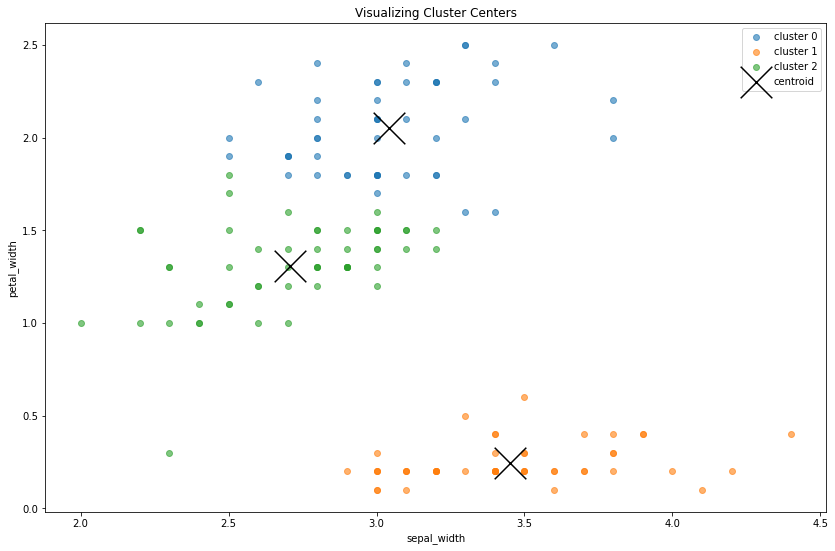

In [23]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

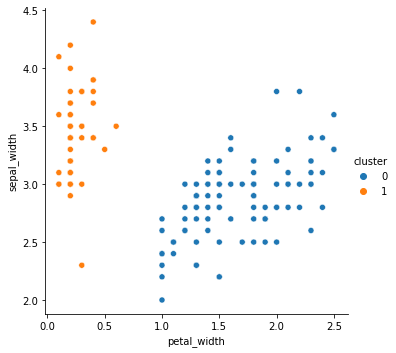

In [24]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)

sns.relplot(data=iris, x='petal_width', y='sepal_width', hue='cluster')

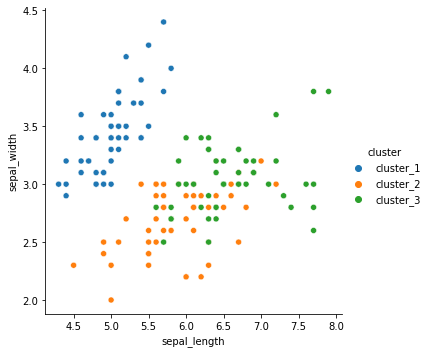

In [27]:
kmeans = KMeans(n_clusters=3).fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
sns.relplot(data=iris, x='sepal_length', y='sepal_width', hue='cluster')

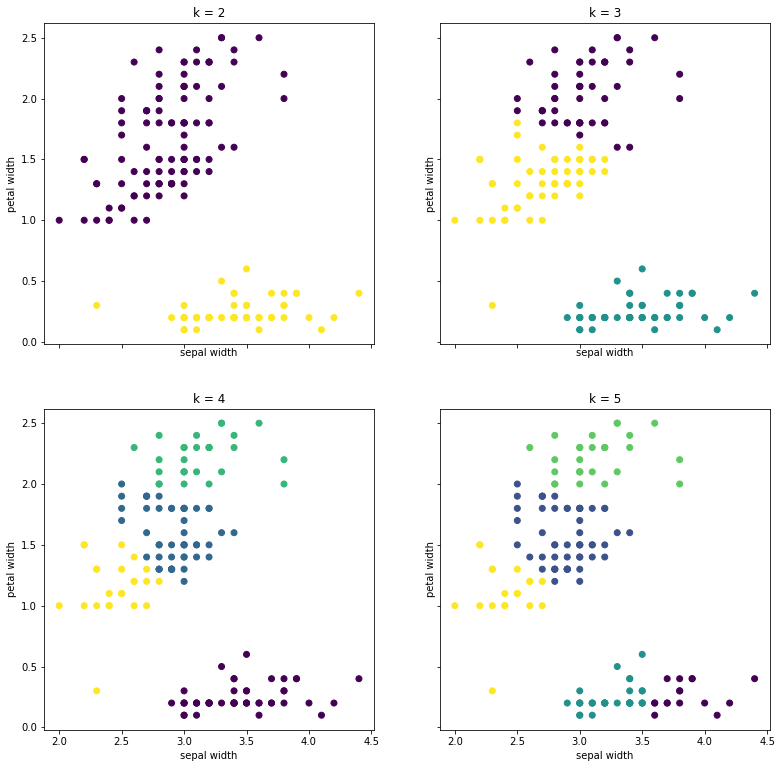

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

In [30]:
#1.c. Best value for k is 2

In [49]:
#1.d.
X = iris[['sepal_width', 'petal_width', 'petal_length']]

In [50]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [51]:
iris['cluster'] = kmeans.predict(X)

In [52]:
kmeans.cluster_centers_

array([[2.75471698, 1.3509434 , 4.28113208],
       [3.428     , 0.246     , 1.462     ],
       [3.00425532, 2.04255319, 5.6106383 ]])

In [53]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,sepal_width,petal_width,petal_length
0,2.754717,1.350943,4.281132
1,3.428000,0.246000,1.462000
2,3.004255,2.042553,5.610638


In [54]:
iris.groupby('cluster')['petal_width', 'sepal_length', 'petal_length'].mean()

,petal_width,sepal_length,petal_length
cluster,,,
0,1.350943,5.915094,4.281132
1,0.246000,5.006000,1.462000
2,2.042553,6.653191,5.610638


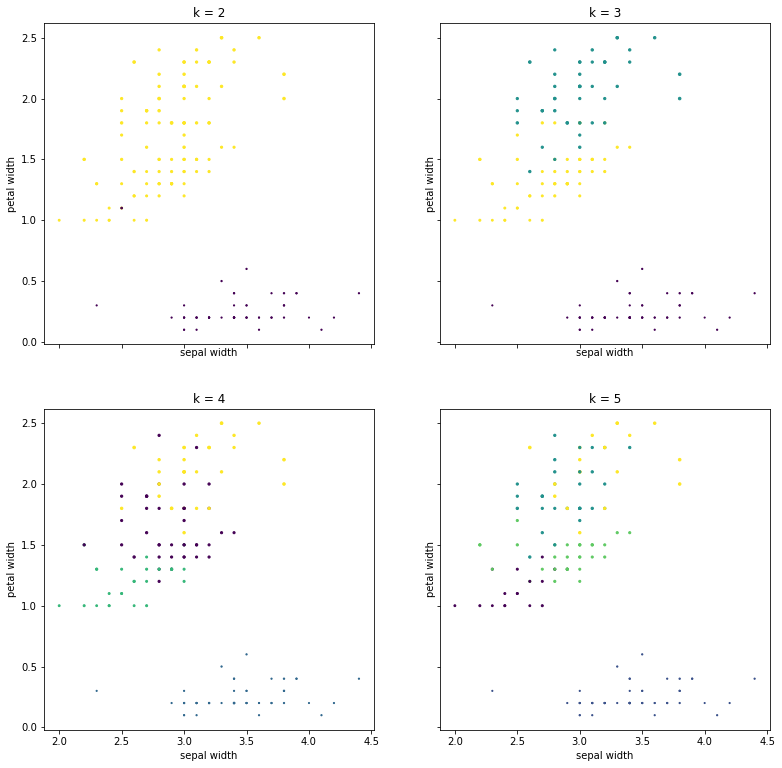

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

In [60]:
#2.
mall_query = '''
             SELECT *
             FROM customers
             '''

In [63]:
def get_db_url(host, user, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [65]:
from env import host, user, password

In [66]:
database = 'zillow'

url = get_db_url(host, user, password, database)

In [67]:
mall_database = 'mall_customers'

mall_url = get_db_url(host, user, password, mall_database)

In [68]:
mall_df = pd.read_sql(mall_query, mall_url)

mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
X = mall_df[['age', 'annual_income']]

In [71]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [72]:
mall_df['cluster'] = kmeans.predict(X)

In [73]:
kmeans.cluster_centers_

array([[28.36      , 31.44      ],
       [34.34782609, 82.82608696],
       [55.03448276, 50.34482759]])

In [74]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,annual_income
0,28.360000,31.440000
1,34.347826,82.826087
2,55.034483,50.344828


In [75]:
mall_df.groupby('cluster')['age', 'annual_income'].mean()

,age,annual_income
cluster,,
0,28.360000,31.440000
1,34.347826,82.826087
2,55.034483,50.344828


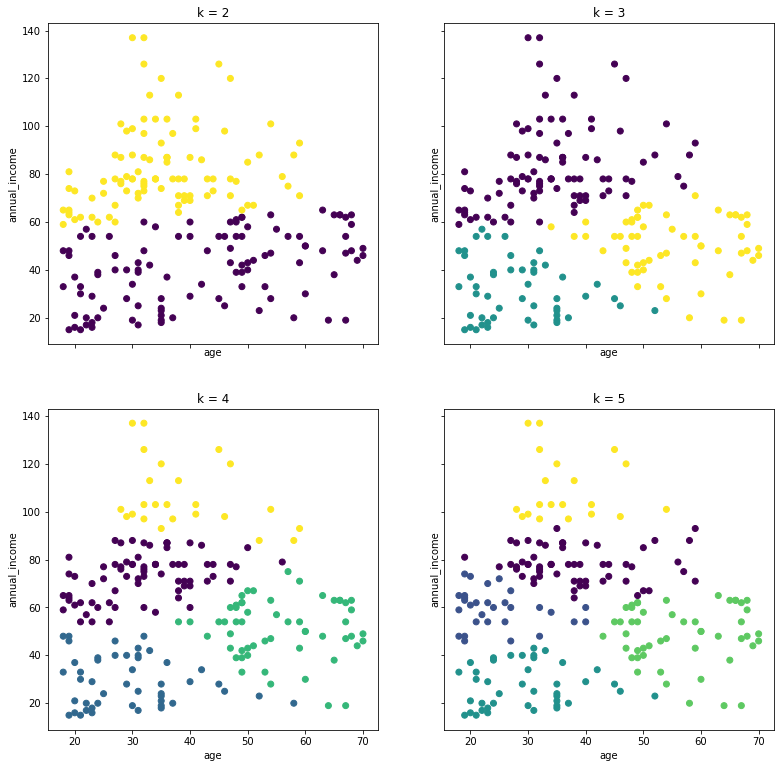

In [77]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')

In [79]:
#3.
# Scale the data
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the scaler
scaler.fit(X)

# Use the scaler to transform train, validate, test
X_scaled = scaler.transform(X)

# Turn everything into a dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [81]:
X_scaled

,age,annual_income
0,0.019231,0.000000
1,0.057692,0.000000
2,0.038462,0.008197
3,0.096154,0.008197
4,0.250000,0.016393
...,...,...
195,0.326923,0.860656
196,0.519231,0.909836
197,0.269231,0.909836
198,0.269231,1.000000


In [82]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [83]:
mall_df['cluster'] = kmeans.predict(X_scaled)

In [84]:
kmeans.cluster_centers_

array([[0.15264423, 0.21016906],
       [0.71952663, 0.30264817],
       [0.33315276, 0.58543062]])

In [85]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_scaled.columns)
centroids

,age,annual_income
0,0.152644,0.210169
1,0.719527,0.302648
2,0.333153,0.585431


In [86]:
mall_df.groupby('cluster')['age', 'annual_income'].mean()

,age,annual_income
cluster,,
0,25.937500,40.640625
1,55.415385,51.923077
2,35.323944,86.422535


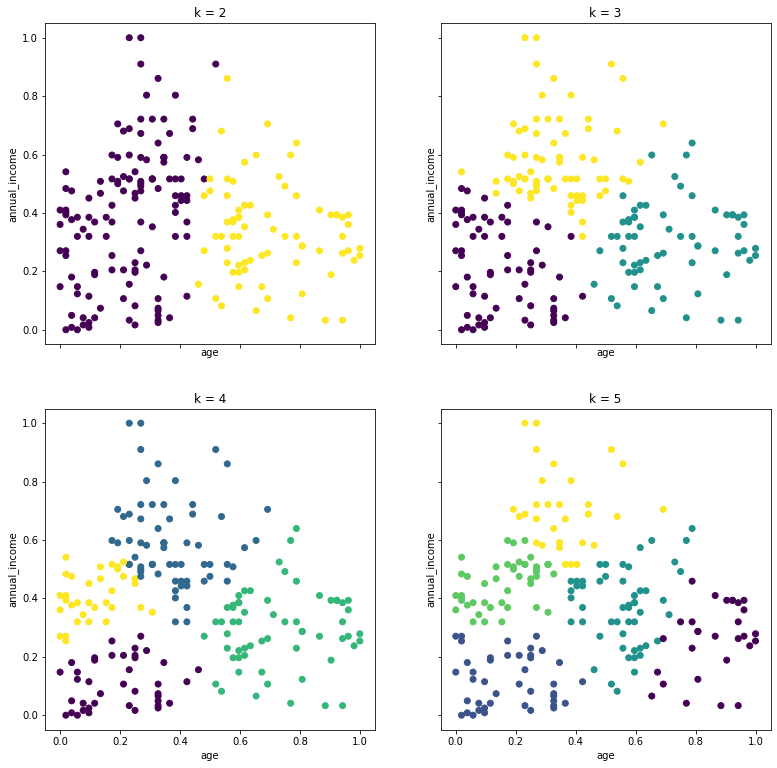

In [87]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X_scaled.age, X_scaled.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')